In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [2]:
data = pd.read_csv('./data/my_PJME_MW.csv')
data.loc[:,'DateTime'] = pd.to_datetime(data.Date.astype(str)+' '+data.Time.astype(str))
data = data.set_index('DateTime')
data.head()

,Date,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
DateTime,,,,,,,,,,,,,,
2002-01-01 01:00:00,2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01 02:00:00,2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01 03:00:00,2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01 04:00:00,2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01 05:00:00,2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [3]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [4]:
data_m = data.resample('M').mean()

/home/yzi/projects/gb_ml_bysiness/env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


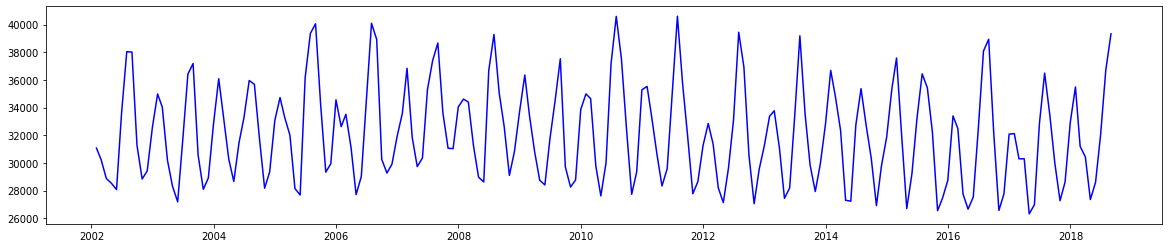

In [5]:
plt.figure(figsize =(20,4))
plt.plot(data_m.index, data_m['PJME_MW'],'b')
plt.show()

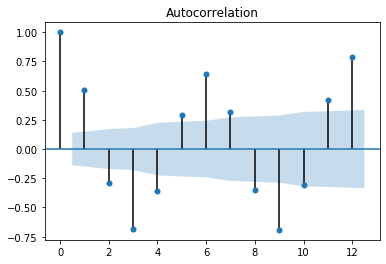

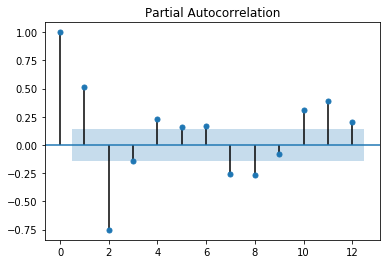

In [6]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=12)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=12)
plt.show()

In [7]:
import warnings

q = 1
p = 0
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и d, 
qs = 1
ps = 1
ds = 0
seasonal_pdq = [ps, ds, qs , 12] 

In [8]:
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-26],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[0, 1, 1]x[1, 0, 1, 12] - AIC:2826.0094426006162


In [9]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  174
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1409.005
Date:                            Thu, 12 Dec 2019   AIC                           2826.009
Time:                                    15:39:45   BIC                           2838.285
Sample:                                         0   HQIC                          2830.994
                                            - 174                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

Лучшие результаты на месячных данных параметры модели SARIMA(0, 1, 0)x(2, 2, 1, 26)

In [17]:
warnings.filterwarnings("ignore")

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-26],order=[0,1,0],
                                seasonal_order=[2, 2, 1, 26] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 1323.1489684966018


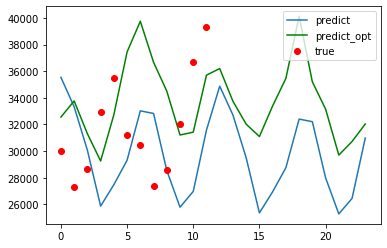

In [18]:
pred_dynamic = results.forecast(24)
pred_dynamic_opt = results_opt.forecast(24)

plt.plot(pred_dynamic, label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-12:],'or',label='true')

plt.legend()

plt.show()

что-то пошло не так.. ушел доучиваться